# Week-3 - Customer Churn Prediction 

# Download data

In [4]:
## Download data
#!wget https://www.kaggle.com/datasets/blastchar/telco-customer-churn/download?datasetVersionNumber=1 -O 03_data-Telco-Customer-Churn.csv

# Import modules

In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

# Load data

In [6]:
df = pd.read_csv('03_data-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Standardize data

In [9]:
# Standardize column names 
df.columns = df.columns.str.lower().str.replace(' ','_')

# get list of categorical features
features_cat = list(df.dtypes[df.dtypes == 'object'].index)

# standardize categorical features data
for f in features_cat:
    df[f] = df[f].str.lower().str.replace(' ','_')
    

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


***

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [12]:
# Total change feature 
df.totalcharges.value_counts()

_         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

There are `_` present in this column. So, this feature, which should technically be a float type is now being interpreted as object. Let's change it now!

In [13]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = tc
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df.totalcharges.value_counts()

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: totalcharges, Length: 6531, dtype: int64

In [15]:
## Look at churn feature and change it to a binary type
df.churn.value_counts()

no     5174
yes    1869
Name: churn, dtype: int64

In [16]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

***

# Setting up Validation framework

Split data into train-validation and test datasets but week using scikit-learn library

In [29]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [30]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [31]:
# Get y variables 
y_train = df_train.churn.values
y_val   = df_val.churn.values
y_test  = df_test.churn.values

In [32]:
len(y_train), len(y_val), len(y_test)

(4225, 1409, 1409)

In [34]:
# Drop the churn feature from df_train, df_val and df_test
del df_train['churn']
del df_val['churn']
del df_test['churn']

***

# EDA 

## Check missing values 

In [35]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values; Already fixed before.

In [38]:
df_train_full.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [40]:
global_churn_rate = df_train_full.churn.mean()
global_churn_rate

0.26996805111821087

In [42]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [43]:
# Create a list of numeric features 
list_features_num = ['tenure', 'monthlycharges', 'totalcharges']
list_features_num

['tenure', 'monthlycharges', 'totalcharges']

In [54]:
list_features_cat = list(set(df_train_full.columns) - set(list_features_num) - set(['churn','customerid']))
list_features_cat

['paymentmethod',
 'multiplelines',
 'onlinesecurity',
 'streamingmovies',
 'phoneservice',
 'seniorcitizen',
 'internetservice',
 'streamingtv',
 'contract',
 'gender',
 'deviceprotection',
 'techsupport',
 'onlinebackup',
 'partner',
 'paperlessbilling',
 'dependents']

In [55]:
len(list_features_cat), len(list_features_num)

(16, 3)

In [56]:
len(df_train_full.columns)

21

In [62]:
# Get unique values in categorical variables 
df_train_full[list_features_cat].nunique()

paymentmethod       4
multiplelines       3
onlinesecurity      3
streamingmovies     3
phoneservice        2
seniorcitizen       2
internetservice     3
streamingtv         3
contract            3
gender              2
deviceprotection    3
techsupport         3
onlinebackup        3
partner             2
paperlessbilling    2
dependents          2
dtype: int64

***

# Feature Importance: Churn Rate and Risk Ratio

In [66]:
## Gender = 'female' and churn rate 
churn_female = df_train_full[df_train_full.gender == 'female'].churn.mean()
churn_male = df_train_full[df_train_full.gender == 'male'].churn.mean()

churn_female, churn_male, global_churn_rate

(0.27682403433476394, 0.2632135306553911, 0.26996805111821087)

In [68]:
## Partner and chur rate 
churn_partner  = df_train_full[df_train_full.partner == 'yes'].churn.mean()
churn_npartner = df_train_full[df_train_full.partner == 'no'].churn.mean()

churn_partner, churn_npartner

(0.20503330866025166, 0.3298090040927694)

### Risk Rate

In [69]:
churn_npartner / global_churn_rate

1.2216593879412643

In [70]:
churn_partner / global_churn_rate

0.7594724924338315

In [75]:
df_group = df_train_full.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate

In [76]:
df_group.head()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [77]:
from IPython.display import display

In [79]:
# Create groups for each cat feature
for c in list_features_cat:
    df_group = df_train_full.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


***

## FEature Importance: Mutual Information Score

In [82]:
mutual_info_score(df_train_full.churn, df_train_full.contract)

0.0983203874041556

In [94]:
def get_mutual_info_churn_score(series):
    return mutual_info_score(df_train_full.churn, series)

In [97]:
mi = df_train_full[list_features_cat].apply(get_mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

***

# Feature Importance: Correlation

In [98]:
df_train_full[list_features_num]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


In [99]:
df_train_full[list_features_num].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [101]:
df_train_full[df_train_full.tenure <= 2].churn.mean()

0.5953420669577875

In [102]:
df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <= 12)].churn.mean()

0.3994413407821229

In [103]:
df_train_full[df_train_full.tenure > 12].churn.mean()

0.17634908339788277

In [104]:
## Monthly charges
df_train_full[df_train_full.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [105]:
df_train_full[(df_train_full.monthlycharges > 20) & (df_train_full.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [106]:
df_train_full[df_train_full.monthlycharges > 50].churn.mean()

0.32499341585462205

***

# One-hot encoding

- To encode categorical features

In [108]:
df_train_full[['gender','contract']]

,gender,contract
1814,male,two_year
5946,female,one_year
3881,male,two_year
2389,male,one_year
3676,male,one_year
...,...,...
905,male,month-to-month
5192,male,two_year
3980,male,month-to-month
235,male,month-to-month


In [131]:
train_dicts = df_train_full[list_features_cat].iloc[:10].to_dict(orient='records')
train_dicts

[{'paymentmethod': 'mailed_check',
  'multiplelines': 'no',
  'onlinesecurity': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'phoneservice': 'yes',
  'seniorcitizen': 0,
  'internetservice': 'no',
  'streamingtv': 'no_internet_service',
  'contract': 'two_year',
  'gender': 'male',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'partner': 'yes',
  'paperlessbilling': 'no',
  'dependents': 'yes'},
 {'paymentmethod': 'credit_card_(automatic)',
  'multiplelines': 'no',
  'onlinesecurity': 'yes',
  'streamingmovies': 'yes',
  'phoneservice': 'yes',
  'seniorcitizen': 0,
  'internetservice': 'dsl',
  'streamingtv': 'no',
  'contract': 'one_year',
  'gender': 'female',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'onlinebackup': 'yes',
  'partner': 'no',
  'paperlessbilling': 'no',
  'dependents': 'no'},
 {'paymentmethod': 'bank_transfer_(automatic)',
  'multiplelines': 'yes',
 

In [132]:
dv = DictVectorizer(sparse=False)

In [133]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [134]:
dv.transform(train_dicts)

array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
   

In [135]:
dv.get_feature_names()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'multiplelines=no',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_service',
 'streamingtv=yes',
 'techsupport=no',
 'techsupport=no_internet_servi

***

# Logistic Regression

In [136]:
def sigmod(z):
    return 1/(1+np.exp(-z))

In [137]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

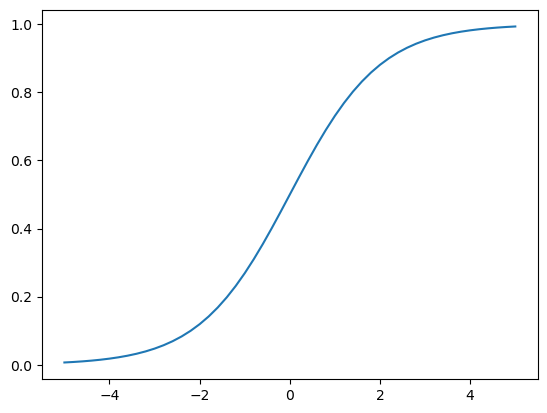

In [138]:
plt.plot(z, sigmod(z))

In [139]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result 

In [140]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmod(score)
    
    return result 